In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train data

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Step 2: Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

0

# Step 3: Seperate X and Y(Survived)

In [16]:
X = df.drop(columns=['id','Process temperature [K]','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [17]:
X

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,1759,29.1,200,0,0,0,0,0
2,L,299.3,1805,26.5,25,0,0,0,0,0
3,L,301.0,1524,44.3,197,0,0,0,0,0
4,M,298.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,1530,37.5,210,0,0,0,0,0
136425,H,297.5,1447,49.1,2,0,0,0,0,0
136426,L,300.5,1524,38.5,214,0,0,0,0,0
136427,L,301.7,1447,46.3,42,0,0,0,0,0


In [18]:
X.head()

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,1759,29.1,200,0,0,0,0,0
2,L,299.3,1805,26.5,25,0,0,0,0,0
3,L,301.0,1524,44.3,197,0,0,0,0,0
4,M,298.0,1641,35.4,34,0,0,0,0,0


In [19]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [20]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

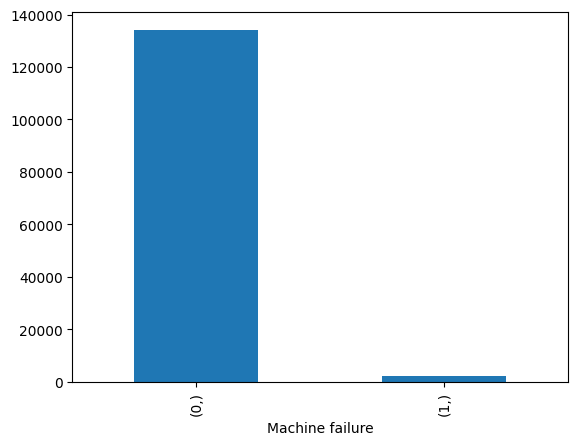

In [21]:
Y.value_counts().plot(kind='bar')


# Step 4: Perform Preprocessing on X

In [22]:
# Sep cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Product ID', 'Type']

In [14]:
con

['Rotational speed [rpm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [23]:
num_pipe = Pipeline(steps=[('impute' , SimpleImputer (strategy='median')),
                           ('scaler' , StandardScaler())])

In [24]:
cat_pipe = Pipeline(steps=[('impute' , SimpleImputer (strategy='most_frequent')),
                           ('ohe' , OneHotEncoder(handle_unknown='ignore' , sparse_output=False))])

In [25]:
pre = ColumnTransformer([('num' , num_pipe , con),
                         ('cat' , cat_pipe , cat)]).set_output(transform='pandas')

In [26]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


# Step 5: Perform train test split

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [28]:
xtrain.head()

,num__Air temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
29391,-0.194806,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
111006,0.073688,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
16102,0.288483,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
110599,1.040265,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
84638,2.114241,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [29]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [30]:
xtest.head()

,num__Air temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
22333,1.684651,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
35216,1.953144,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
112970,1.308759,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
14905,0.664374,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
25676,1.308759,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [31]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


In [32]:
xtrain.shape

(109143, 12)

In [33]:
xtest.shape

(27286, 12)


# Step 6: Perform Algorithm evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [35]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boosting': GradientBoostingClassifier()}

In [36]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting'])

In [37]:
dct.values()

dict_values([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()])

In [38]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

In [39]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [40]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate F1 score in train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Calcualte F1 5 fold cross validated score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append all above values in list
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train F1 : {f1_train:.4f}')
    print(f'Test F1 : {f1_test:.4f}')
    print(f'Train F1 CV 5 Fold : {f1_cv:.4f}')
    print('\n==================================================\n')

Model Name : Logistic

Train F1 : 0.9318
Test F1 : 0.9255
Train F1 CV 5 Fold : 0.9312


Model Name : Decision Tree

Train F1 : 0.9966
Test F1 : 0.8653
Train F1 CV 5 Fold : 0.8719


Model Name : Random Forest

Train F1 : 0.9966
Test F1 : 0.9262
Train F1 CV 5 Fold : 0.9292


Model Name : Gradient Boosting

Train F1 : 0.9368
Test F1 : 0.9232
Train F1 CV 5 Fold : 0.9285




# Save above results in dataframe

In [41]:
results = {'name':dct.keys(),
           'F1 train':train,
           'F1 test':test,
           'F1 Train CV': train_cv}

In [42]:
df_res = pd.DataFrame(results)
df_res

,name,F1 train,F1 test,F1 Train CV
0,Logistic,0.931790,0.925459,0.931215
1,Decision Tree,0.996583,0.865342,0.871912
2,Random Forest,0.996591,0.926229,0.929181
3,Gradient Boosting,0.936793,0.923174,0.928508


In [43]:
df_res.sort_values(by='F1 Train CV', ascending=False)

,name,F1 train,F1 test,F1 Train CV
0,Logistic,0.931790,0.925459,0.931215
2,Random Forest,0.996591,0.926229,0.929181
3,Gradient Boosting,0.936793,0.923174,0.928508
1,Decision Tree,0.996583,0.865342,0.871912


# For this dataset Logistic performs best with highest cross validation score of 0.9312

## Build and evaluate Logistic model

In [44]:
model = LogisticRegression()
model.fit(xtrain,ytrain)


LogisticRegression()

In [45]:
model.score(xtrain, ytrain)

0.9962434604143189

In [46]:
model.score(xtest,ytest)

0.9959319797698454

# Plot the confusion matrix

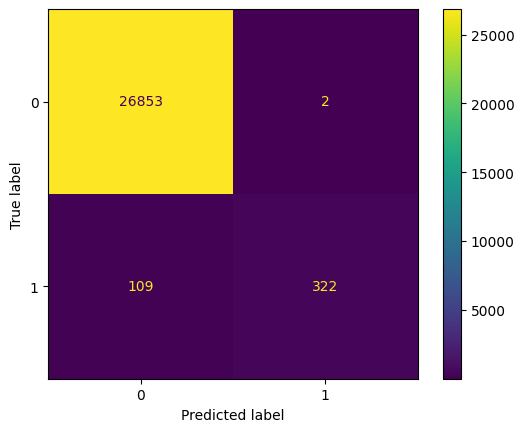

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest, ytest)

In [48]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [49]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [51]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [52]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       0.99      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



# Plot ROC AUC (Reciever Operator Characterestics, Area under curve)

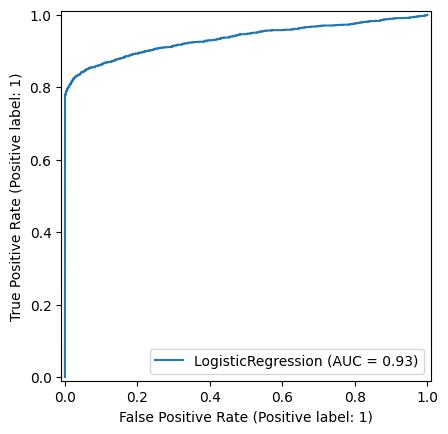

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, xtrain, ytrain)

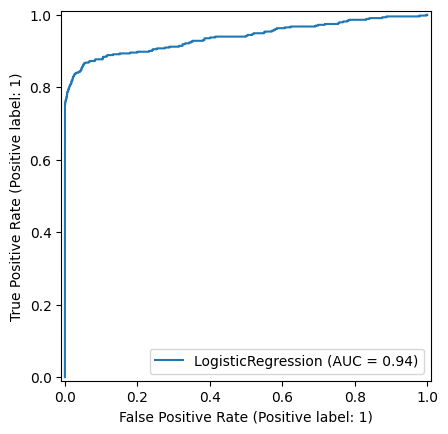

In [55]:
RocCurveDisplay.from_estimator(model, xtest, ytest)

In [56]:
roc_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='roc_auc')
roc_scores

array([0.93327936, 0.91815044, 0.93343111, 0.94213062, 0.93990899])

In [57]:
roc_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='roc_auc')
roc_scores

array([0.93327936, 0.91815044, 0.93343111, 0.94213062, 0.93990899])

# Perform Out of Sample Predictions

In [58]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [59]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [60]:
X_new_pre = pre.transform(xnew)
X_new_pre

,num__Air temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90950,-1.053986,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90951,-2.289058,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90952,-0.946589,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


# Predict results along with probability

In [61]:
preds = model.predict(X_new_pre)
probs = model.predict_proba(X_new_pre)

In [62]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
probs

array([[0.99777085, 0.00222915],
       [0.99881656, 0.00118344],
       [0.9976605 , 0.0023395 ],
       ...,
       [0.99790206, 0.00209794],
       [0.99811069, 0.00188931],
       [0.99731153, 0.00268847]])

In [64]:
model.classes_

array([0, 1], dtype=int64)

In [65]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.00222915, 0.00118344, 0.0023395 , 0.00306311, 0.00389865])

In [66]:
import numpy as np 
max_prob = np.max(probs, axis=1)
max_prob

array([0.99777085, 0.99881656, 0.9976605 , ..., 0.99790206, 0.99811069,
       0.99731153])

In [68]:
xnew['Machine failure'] = preds 
xnew['Probability'] = max_prob

In [69]:
df_res= xnew[['id', 'Machine failure', 'Probability']]
df_res.head(10)

,id,Machine failure,Probability
0,136429,0,0.997771
1,136430,0,0.998817
2,136431,0,0.997660
3,136432,0,0.996937
4,136433,0,0.996101
5,136434,0,0.998134
6,136435,0,0.997325
7,136436,0,0.993482
8,136437,0,0.997434
9,136438,0,0.998256


In [71]:
# Save above dataframe to csv
df_res.to_csv('Results.csv', index=False)